
# Project: Investigate a Dataset - [Dataset-tmdb movie data analysis]

## Introduction
​
### Dataset Description 
​
> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present.
List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 
​
​
### Question(s) for Analysis
1. How movies run time changes?
2. How is the runtime changes with years?
3. what is the longest movie?
4. what is the shortest movie?
5. what is the most release year?
6. what is the most release month?
7. what is the 10 highest-grossing movies of all time?
8. What is the most released movies genres?
9. what is the best 10 rate movie ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling


In [2]:
tmdb = pd.read_csv("tmdb-movies.csv")
tmdb


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


### Data Cleaning


In [3]:
#deleting unused data
tmdb =tmdb.drop(columns=['homepage','tagline','imdb_id','cast'])

In [30]:
tmdb_profit=tmdb[['original_title','budget','revenue']]
tmdb_profit=pd.DataFrame(tmdb_profit)
tmdb_profit=tmdb_profit.replace(0,np.nan)
tmdb_profit.dropna(inplace=True)
tmdb_profit['profit']=tmdb_profit['revenue']-tmdb_profit['budget']
tmdb_profit

,original_title,budget,revenue,profit
0,Jurassic World,150000000.0,1.513529e+09,1.363529e+09
1,Mad Max: Fury Road,150000000.0,3.784364e+08,2.284364e+08
2,Insurgent,110000000.0,2.952382e+08,1.852382e+08
3,Star Wars: The Force Awakens,200000000.0,2.068178e+09,1.868178e+09
4,Furious 7,190000000.0,1.506249e+09,1.316249e+09
...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,7500000.0,3.373669e+07,2.623669e+07
10828,Torn Curtain,3000000.0,1.300000e+07,1.000000e+07
10829,El Dorado,4653000.0,6.000000e+06,1.347000e+06
10835,The Sand Pebbles,12000000.0,2.000000e+07,8.000000e+06


In [5]:
tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [15]:
def data_count(column):
    #separate the string by '|'
    data = tmdb[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    
    return count


# Q1) How movies run time changes?

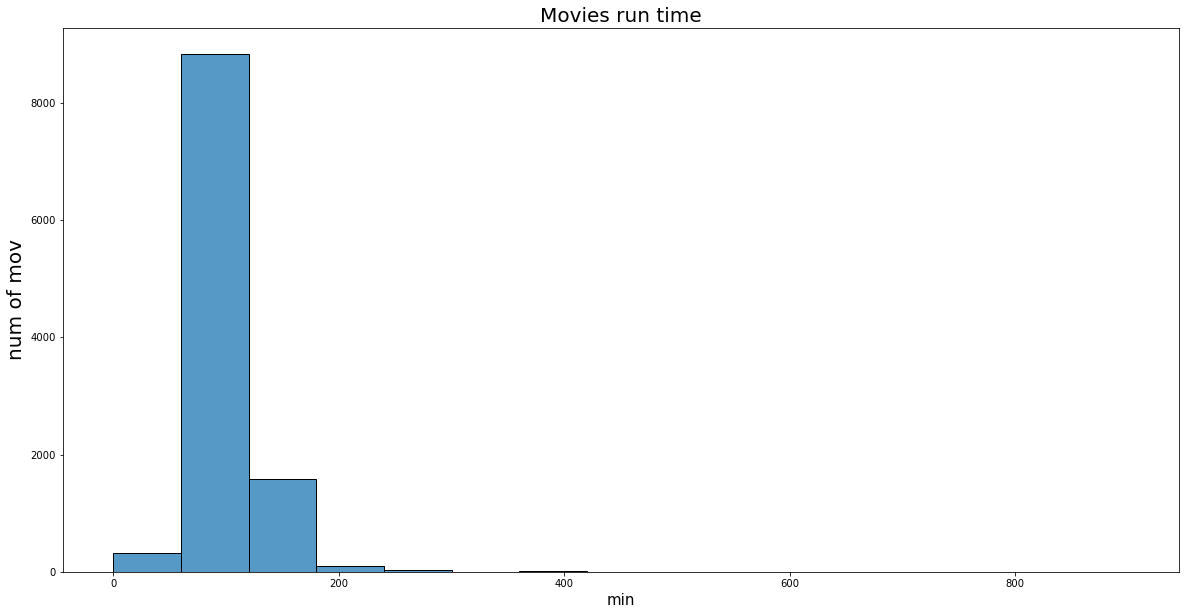

In [67]:
    plt.figure(figsize=(20, 10))
    sns.histplot(tmdb["runtime"], bins=15)
    plt.xlabel('min', fontsize=15)
    plt.ylabel('num of mov', fontsize=20)
    plt.title('Movies run time', fontsize=20)
    plt.show()

# Q1,1) How is the runtime changes with years?


              count        mean        std   min     25%    50%     75%    max
release_year                                                                  
1960           32.0  110.656250  33.492040  70.0   85.75  103.5  126.25  208.0
1961           31.0  119.419355  28.168273  79.0   99.00  110.0  135.00  186.0
1962           32.0  124.343750  36.306588  78.0   97.00  117.5  145.00  216.0
1963           34.0  111.323529  37.168511  18.0   89.00  108.5  125.00  248.0
1964           42.0  109.214286  26.230252  28.0   93.00  110.5  124.50  170.0
1965           35.0  118.171429  34.886780  25.0   97.50  112.0  134.50  199.0
1966           46.0  106.891304  32.342767  25.0   93.25  106.5  122.50  182.0
1967           40.0  104.950000  26.102313   4.0   92.00  107.0  117.75  152.0
1968           39.0  107.282051  34.945031   4.0   95.50  107.0  132.00  155.0
1969           31.0  106.580645  33.198167   2.0   91.00  105.0  128.50  158.0
1970           41.0  112.048780  31.656714  48.0   9

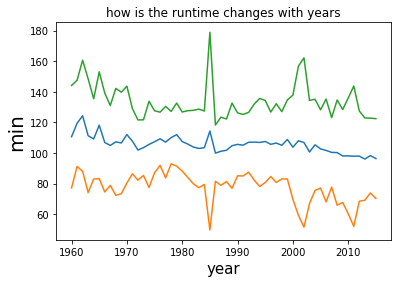

In [68]:
    runtime_in_years = tmdb.groupby(['release_year'])['runtime'].describe()
    print(runtime_in_years)
    avg_run_by_year = runtime_in_years['mean']
    min_run_by_year = runtime_in_years['mean'] - runtime_in_years['std']
    max_run_by_year = runtime_in_years['mean'] + runtime_in_years['std']
    plt.plot(avg_run_by_year)
    plt.plot(min_run_by_year)
    plt.plot(max_run_by_year)
    plt.title('how is the runtime changes with years')
    plt.xlabel('year', fontsize=15)
    plt.ylabel('min', fontsize=20)
    plt.show()

# Q1,2) what is the longest movie?


In [69]:
    print("the longest movie is")
    print(tmdb.original_title[tmdb.runtime == tmdb.runtime.max()])
    print(df.runtime[tmdb.runtime == tmdb.runtime.max()])

the longest movie is
3894    The Story of Film: An Odyssey
Name: original_title, dtype: object
3894    900
Name: runtime, dtype: int64


# Q1,3) what is the shortest movie?


In [70]:
    tmdb_min = tmdb[tmdb['runtime'] != 0]
    print("the sorhtest movie is")
    print(tmdb_min.original_title[tmdb_min.runtime == tmdb_min.runtime.min()])
    print(tmdb_min.runtime.min())

the sorhtest movie is
4883                           Fresh Guacamole
4890                Cousin Ben Troop Screening
7905     The Adventures of AndrÃ© and Wally B.
10550                                 Luxo Jr.
10754                     Bambi Meets Godzilla
Name: original_title, dtype: object
2


 # Q2) how is the movie release year change?


    

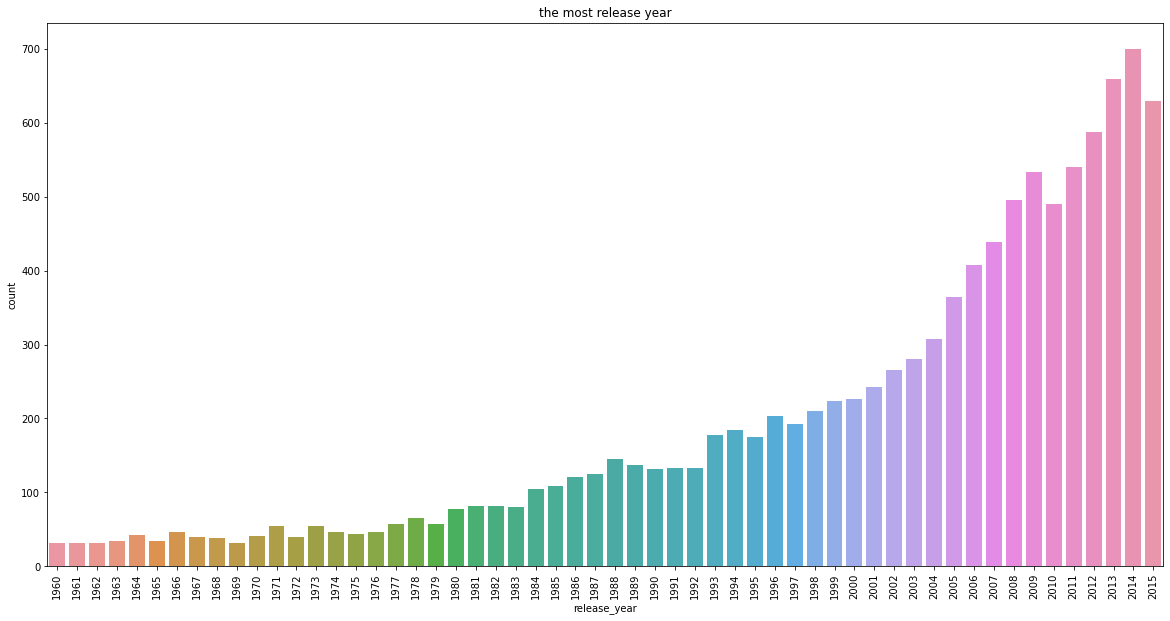

In [71]:
    plt.figure(figsize=(20, 10))
    x = tmdb['release_year']
    sns.countplot(x=x)
    plt.xticks(rotation=90)
    plt.title("the release year")
    plt.show()

 # Q3) how is the movie release month change?


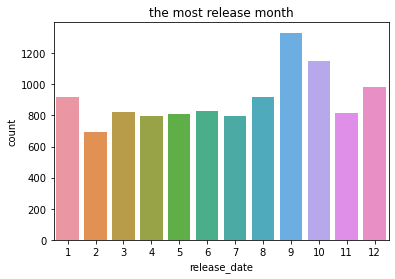

In [72]:
    tmdb['release_date'] = pd.to_datetime(df['release_date'])
    tmdb_months= tmdb['release_date'].dt.month
    plt.title("the most release month")
    sns.countplot(x=tmdb_months)
    plt.show()

# Q4) what is the 10 highest-grossing movies of all time?

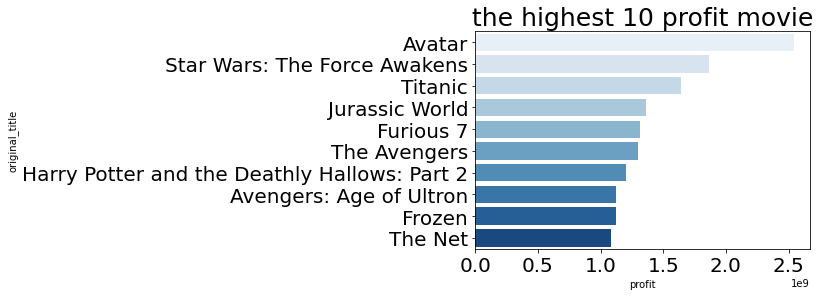

1386    Avatar
Name: original_title, dtype: object 2544505847.0
8094    The Net
Name: original_title, dtype: object 1084279658.0


In [34]:
    tmdb_profit = tmdb_profit[['original_title', 'profit']].sort_values('profit', ascending=False).head(10)
    sns.barplot(x='profit', y='original_title', data=tmdb_profit, palette='Blues')
    plt.title('the highest 10 profit movie', size=25)
    plt.yticks(size=20)
    plt.xticks(size=20)
    plt.show()
    print(tmdb_profit.original_title[tmdb_profit.profit == tmdb_profit.profit.max()], tmdb_profit['profit'].max())
    print(tmdb_profit.original_title[tmdb_profit.profit == tmdb_profit.profit.min()], tmdb_profit['profit'].min())


# Q5) What is the most released movies genres?

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64


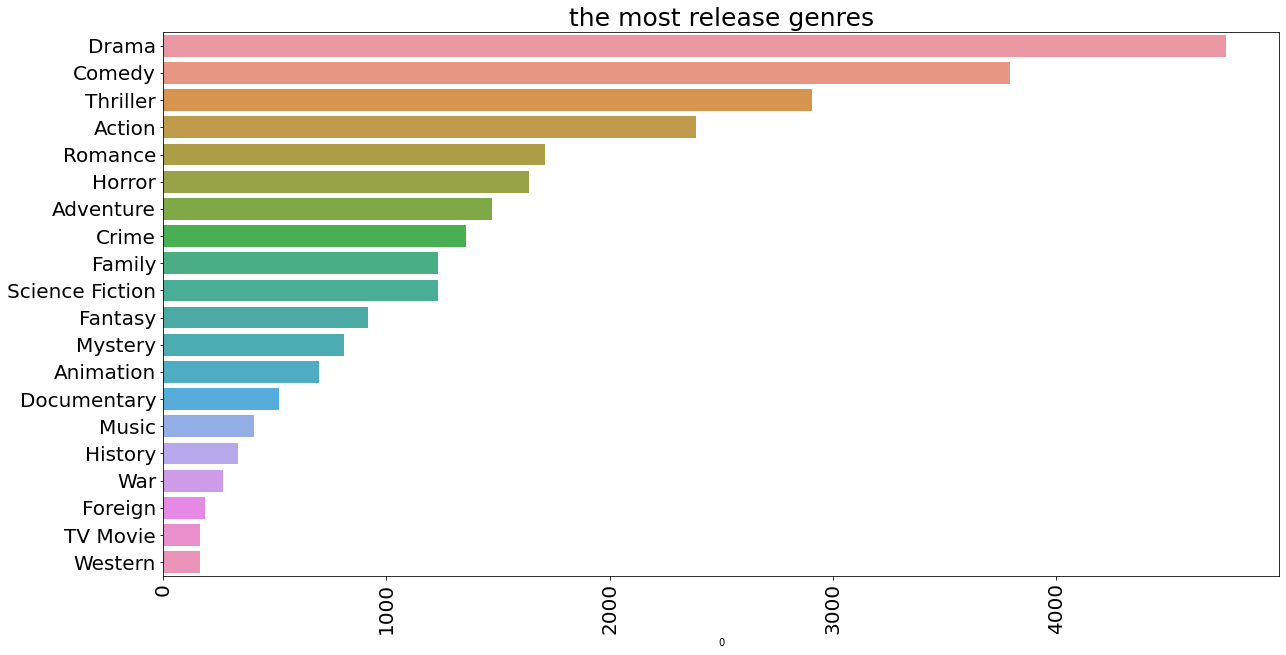

In [28]:
    count = data_count('genres')
    print(count)
    count=pd.DataFrame(count)
    count.rename(columns={"": "genre", "0": "co"})
    plt.figure(figsize=(20, 10))
    sns.barplot(x=count[0], y=count.index, data=count)
    plt.title("the most release genres", size=25)
    plt.yticks(size=20)
    plt.xticks(size=20)
    plt.xticks(rotation=90)
    plt.show()

  # Q6) what is the best 10 rate movie ?


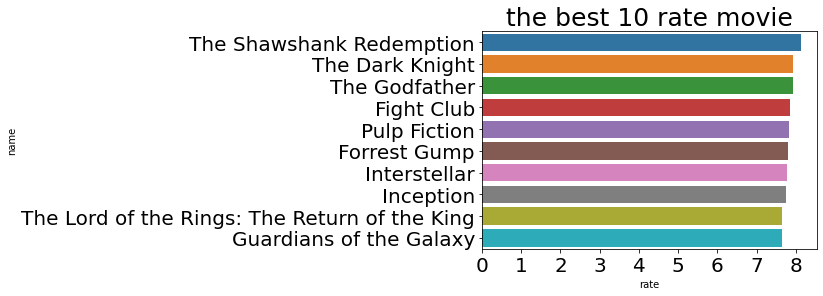

                                               name      rate  vote_average  \
4178                       The Shawshank Redemption  8.128240           8.4   
2875                                The Dark Knight  7.919922           8.1   
7269                                  The Godfather  7.917651           8.3   
2409                                     Fight Club  7.846341           8.1   
4177                                   Pulp Fiction  7.819882           8.1   
4179                                   Forrest Gump  7.792993           8.1   
629                                    Interstellar  7.771297           8.0   
1919                                      Inception  7.748354           7.9   
4949  The Lord of the Rings: The Return of the King  7.641331           7.9   
630                         Guardians of the Galaxy  7.640266           7.9   

      vote_count  
4178        5754  
2875        8432  
7269        3970  
2409        5923  
4177        5343  
4179        4856

In [39]:
    R = tmdb['vote_average']
    v = tmdb['vote_count']
    M = v.describe()
    m = M['mean']
    C = R.describe()
    c = C['std']
    r = {}
    r = pd.DataFrame(r)
    r['name'] = tmdb['original_title']
    r['rate'] = (v / (v + m)) * R + (m / (v + m)) * c
    r['vote_average'] = tmdb['vote_average']
    r['vote_count'] = tmdb['vote_count']
    the_best = r.sort_values('rate', ascending=False).head(10)
    sns.barplot(x='rate', y='name', data=the_best)
    plt.yticks(size=20)
    plt.title("the best 10 rate movie", size=25)
    plt.xticks(size=20)
    plt.show()
    print(r.sort_values('rate', ascending=False).head(10))
    


In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295

# Conclusions


We came out with some very interesting facts about movies. After this analysis we can conclude following:



### from Q1 
the most movies run time is between 50:100 min 
the longest movie is The Story of Film: An Odyssey with 900 min runtime
the shortest movies are Fresh Guacamole Cousin Ben Troop Screening, The Adventures of AndrÃ© and Wally B. , Luxo Jr.
, Bambi Meets Godzilla with 2 min runtime


### from Q2
the most movies released year is 2014


### From Q3
the most movies released month is 9

### From Q4
the 10 highest-grossing movies of all time is Avatar, Star Wars: The Force Awakens, Titanic, Jurassic World, Furious 7
, The Avengers, Harry Potter and the Deathly Hallows: Part 2, Avengers: Age of Ultron, Frozen and The Net

### From Q5
 the most released movies genres is drama


### From Q6
the best 10 rate movie Jurassic World                                                                                           
1- The Shawshank Redemption: 8.128240                                                                                           
2-The Dark Knight:7.919922   
3-The Godfather:7.917651    
4-Fight Club:7.846341    
5-Pulp Fiction:7.819882         
6-Forrest Gump:7.792993                                                                                                         
7-Interstellar:7.771297                                                                                                         
8-Inception:7.748354                                                                                                           
9-The Lord of the Rings: The Return of the King                                                                                 
10-Guardians of the Galaxy  7.640266

Limitations: The analysis has over 4000 missing values in the 'revenue' and 'budget' column with null values. so it might be possible different movies have 'budget' and 'revenue